Data: https://github.com/CSSEGISandData/COVID-19

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [84]:
# Importing data

confirmed_dataset = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_dataset = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_dataset = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [6]:
confirmed_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


In [85]:
# Transforming datasets taking only date columns

confirmed_cases = confirmed_dataset.iloc[:, 4:]
confirmed_deaths = deaths_dataset.iloc[:, 4:]
confirmed_recoveries = recoveries_dataset.iloc[:, 4:]

In [8]:
confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,0,0,0,0,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,0,0,0,0,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,0,0,0,0,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,0,0,0,0,0,0,0,0,0,0,...,717,717,723,723,731,738,738,743,743,743
4,0,0,0,0,0,0,0,0,0,0,...,24,24,25,25,25,25,26,27,27,27


In [86]:
dates = confirmed_cases.keys()
brazil_confirmed_cases = []
brazil_deaths = []
brazil_recoveries = []
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [87]:
# Fitting dates starting with Brazil first confirmed case (26/02)
brazil_dates = dates[34:]

In [88]:
# Getting Brazil data

for i in brazil_dates:
    brazil_confirmed_cases.append(confirmed_dataset[confirmed_dataset['Country/Region']=='Brazil'][i].sum())
    brazil_deaths.append(deaths_dataset[deaths_dataset['Country/Region']=='Brazil'][i].sum())
    brazil_recoveries.append(recoveries_dataset[recoveries_dataset['Country/Region']=='Brazil'][i].sum())
    


In [89]:
days_since_26_02 = np.array([i for i in range(len(brazil_dates))]).reshape(-1, 1)

Text(0.5, 0, 'days since 26/02')

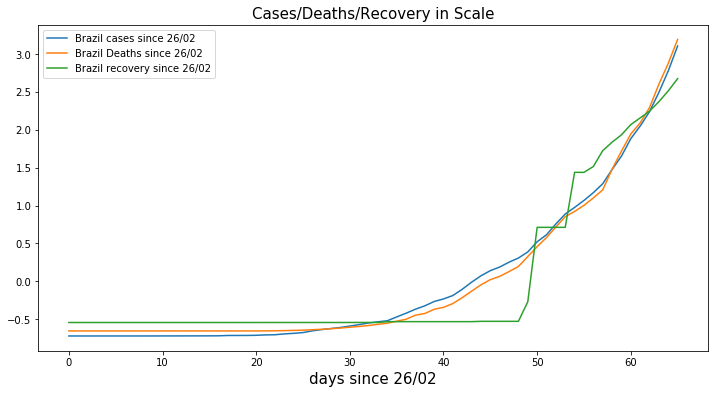

In [90]:
# Scaling Cases, deaths and recoveries to compare the curves

brazil_cases = np.array([brazil_confirmed_cases, brazil_deaths, brazil_recoveries]).transpose().astype(int)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
brazil_cases = scaler.fit_transform(brazil_cases)

plt.figure(figsize=(12, 6))
plt.plot(days_since_26_02, brazil_cases)
plt.title('Cases/Deaths/Recovery in Scale', size=15)
plt.legend(['Brazil cases since 26/02', 'Brazil Deaths since 26/02', 'Brazil recovery since 26/02'])
plt.xlabel('days since 26/02', size=15)

In [91]:
# Daily Increase Function
def daily_increase(data):
    daily_inc = [brazil_confirmed_cases[0]]
    for i in range(1, len(data)):
        daily_inc.append(data[i]-data[i-1])
    return daily_inc

In [92]:
brazil_daily_case_increase = daily_increase(brazil_confirmed_cases)
brazil_daily_death_increase = daily_increase(brazil_deaths)
brazil_daily_recovery_increase = daily_increase(brazil_recoveries)

In [93]:
# Adjusting date to fit into bar chart

adj_days_since_26_02 = days_since_26_02.reshape(1, -1)[0]

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

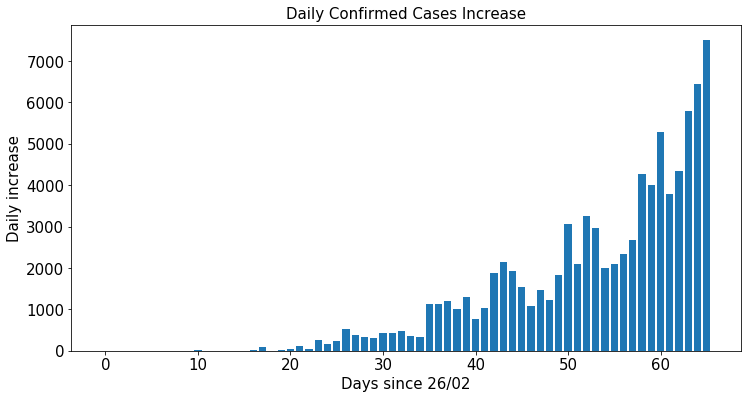

In [94]:
# Transforming dates in numpy array and plotting charts

plt.figure(figsize=(12, 6))
plt.bar(adj_days_since_26_02, brazil_daily_case_increase)
plt.title('Daily Confirmed Cases Increase', size=15)
plt.xlabel('Days since 26/02', size=15)
plt.ylabel('Daily increase', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

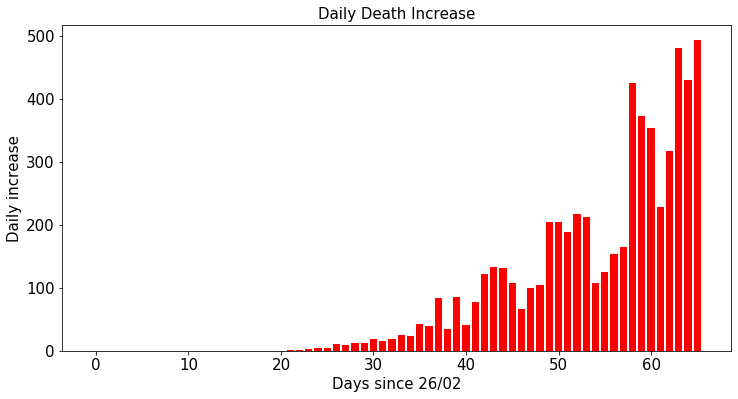

In [95]:
plt.figure(figsize=(12, 6))
plt.bar(adj_days_since_26_02, brazil_daily_death_increase, color='red')
plt.title('Daily Death Increase', size=15)
plt.xlabel('Days since 26/02', size=15)
plt.ylabel('Daily increase', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text yticklabel objects>)

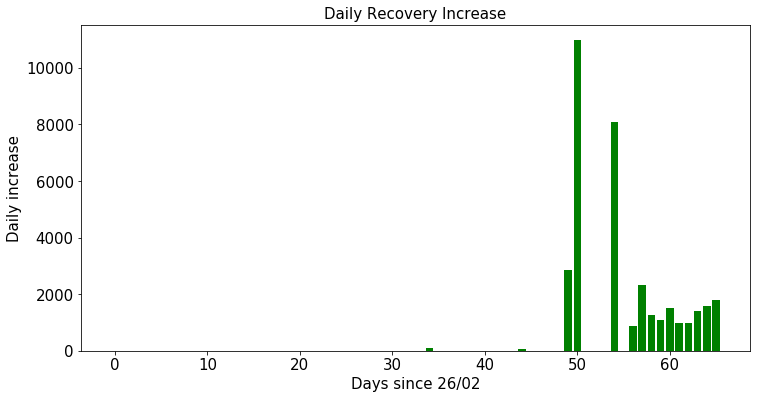

In [96]:
plt.figure(figsize=(12, 6))
plt.bar(adj_days_since_26_02, brazil_daily_recovery_increase, color='green')
plt.title('Daily Recovery Increase', size=15)
plt.xlabel('Days since 26/02', size=15)
plt.ylabel('Daily increase', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [97]:
# Creating a +7 days date range to build forecast

future_days_range = 7

future_forecast = np.array([i for i in range(len(brazil_dates)+future_days_range)]).reshape(-1, 1)
adjusted_brazil_dates = future_forecast[:-7]

# Creating train and test samples

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_confirmed_train, X_confirmed_test, y_confirmed_train, y_confirmed_test = train_test_split(days_since_26_02, brazil_confirmed_cases, test_size=0.15, shuffle=False)

In [98]:
# Model Params selection
from sklearn.svm import SVR

c = [0.01, 0.02, 0.03]
gamma = [0.01, 0.04, 0.07]
epsilon = [0.7, 1]
degree = [4, 5]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'degree': degree }

svm = SVR(kernel='poly')
svm_search = GridSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
svm_search.fit(X_confirmed_train, y_confirmed_train)
best_params = svm_search.best_params_
best_score = svm_search.best_score_

In [23]:
best_params

{'C': 0.01, 'degree': 4, 'epsilon': 1, 'gamma': 0.07}

In [99]:
# Using Support Vector Regression (SVR) for prediction
from sklearn.svm import SVR

svr_confirmed_cases = SVR(kernel='poly',gamma=0.04,epsilon=0.1,degree=4, C=0.01, shrinking=True)
svr_confirmed_cases.fit(X_confirmed_train, y_confirmed_train)
svr_pred = svr_confirmed_cases.predict(future_forecast)

In [100]:
# Running K-Cross Validation for model accuracy analysis
accuracies = cross_val_score(estimator=svr_confirmed_cases, X=X_confirmed_train, y=y_confirmed_train, cv=10)

# Higher Accuracy
max(accuracies)

0.9603204876002294

In [101]:
accuracies

array([-5.83605701e+05, -1.09750307e+04, -6.36561697e+01, -3.98615193e+00,
        5.05660482e-01, -1.11767069e-02,  9.45957931e-01,  8.68925885e-01,
        9.60320488e-01,  9.10882221e-01])

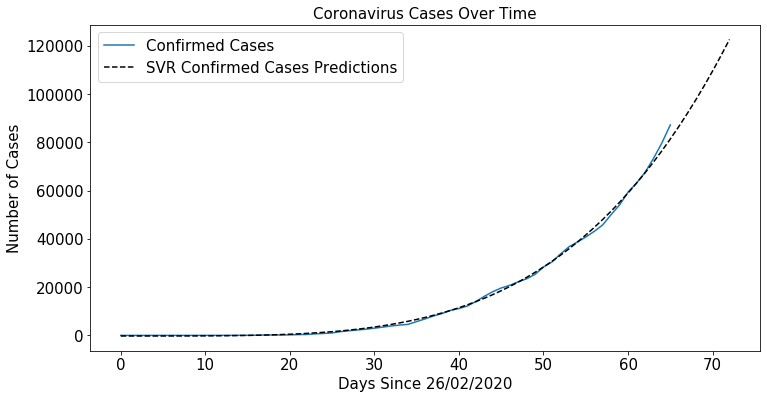

In [102]:
# Building a Plot Chart function

def plot_predictions(x, y, pred, title, pred_name, legend, color):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title(title, size=15)
    plt.xlabel('Days Since 26/02/2020', size=15)
    plt.ylabel('Number of Cases', size=15)
    plt.legend([legend, pred_name], prop={'size': 15})
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()
    
# Build Prediction chart

plot_predictions(adjusted_brazil_dates, brazil_confirmed_cases, svr_pred, 'Coronavirus Cases Over Time', 'SVR Confirmed Cases Predictions', 'Confirmed Cases', 'black')

In [27]:
# Setting deaths data for training/test

X_deaths_train, X_deaths, y_deaths_train, y_deaths_test = train_test_split(days_since_26_02, brazil_deaths, test_size=0.15, shuffle=False)

# Model param selection for deaths

c = [0.01, 0.02, 0.03]
gamma = [0.01, 0.04, 0.07]
epsilon = [0.7, 1]
degree = [4, 5]

svm_grid_deaths = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'degree': degree }

svm_deaths = SVR(kernel='poly')
svm_search_deaths = GridSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
svm_search_deaths.fit(X_deaths_train, y_deaths_train)
best_params_deaths = svm_search_deaths.best_params_
best_score_deaths = svm_search_deaths.best_score_

In [28]:
best_params_deaths

{'C': 0.01, 'degree': 5, 'epsilon': 0.7, 'gamma': 0.01}

In [103]:
svr_deaths = SVR(kernel='poly', C=0.01, degree=5, epsilon=0.7, gamma=0.01)
svr_deaths.fit(X_deaths_train, y_deaths_train)
svr_deaths_pred = svr_deaths.predict(future_forecast)

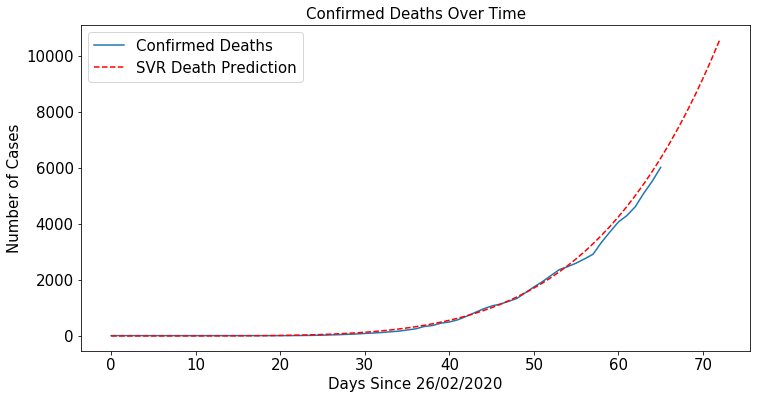

In [104]:
# Plotting death prediction chart

plot_predictions(adjusted_brazil_dates, brazil_deaths, svr_deaths_pred, 'Confirmed Deaths Over Time', 'SVR Death Prediction', 'Confirmed Deaths', 'red')

Now, we are going to start with the comparisons between Brazil and other countries like Spain and Italy. 

To a fair comparison with the same strategy that we used for Brazil, we are going to adjust the days for the days of the first confirmed cases.

In [105]:
italy_confirmed_cases = []
spain_confirmed_cases = []
italy_deaths = []
spain_deaths = []

italy_dates = dates[9: ]
spain_dates = dates[10: ]

for j in italy_dates:
    italy_confirmed_cases.append(confirmed_dataset[confirmed_dataset['Country/Region']=='Italy'][j].sum())
    italy_deaths.append(deaths_dataset[deaths_dataset['Country/Region']=='Italy'][j].sum())

for k in spain_dates:
    spain_confirmed_cases.append(confirmed_dataset[confirmed_dataset['Country/Region']=='Spain'][k].sum())
    spain_deaths.append(deaths_dataset[deaths_dataset['Country/Region']=='Spain'][k].sum())

In [106]:
# Scaling Spain and Italy cases and deaths and plotting charts

italy_cases = np.array([italy_confirmed_cases, italy_deaths]).transpose().astype(int)
italy_cases = scaler.fit_transform(italy_cases)

spain_cases = np.array([spain_confirmed_cases, spain_deaths]).transpose().astype(int)
spain_cases = scaler.fit_transform(spain_cases)

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 9 Text yticklabel objects>)

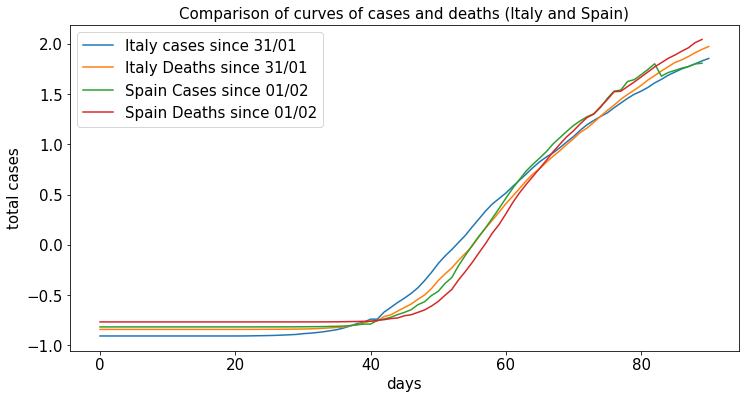

In [107]:
days_since_31_01 = np.array([i for i in range(len(italy_dates))]).reshape(-1, 1)
days_since_01_02 = np.array([i for i in range(len(spain_dates))]).reshape(-1, 1)

plt.figure(figsize=(12, 6))
plt.title('Comparison of curves of cases and deaths (Italy and Spain)', size=15)
plt.plot(days_since_31_01, italy_cases)
plt.plot(days_since_01_02, spain_cases)
plt.legend(['Italy cases since 31/01', 'Italy Deaths since 31/01', 'Spain Cases since 01/02', 'Spain Deaths since 01/02'], prop={'size': 15})
plt.xlabel('days', size=15)
plt.ylabel('total cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

Now, we are going the compare the curves of Brazil, Italy, Spain between day 20 and day 70 after the first confirmed case

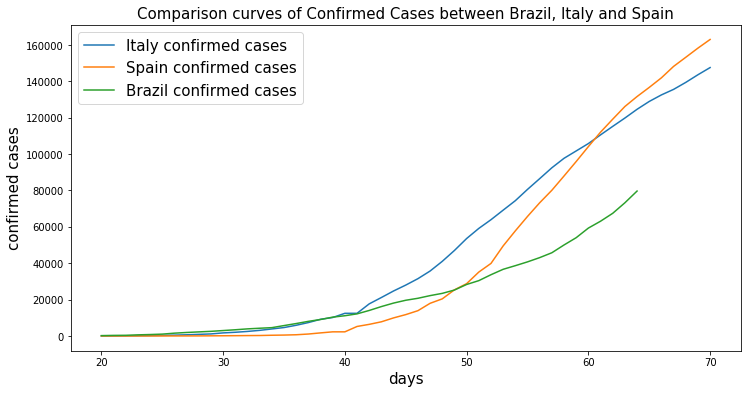

In [82]:
plt.figure(figsize=(12, 6))
plt.title('Comparison curves of Confirmed Cases between Brazil, Italy and Spain', size=15)
plt.plot(days_since_31_01[20:71, :], italy_confirmed_cases[20:71])
plt.plot(days_since_01_02[20:71, :], spain_confirmed_cases[20:71])
plt.plot(days_since_26_02[20:71, :], brazil_confirmed_cases[20:71])
plt.xlabel('days', size=15)
plt.ylabel('confirmed cases', size=15)
plt.legend(['Italy confirmed cases', 'Spain confirmed cases', 'Brazil confirmed cases'], prop={'size': 15})

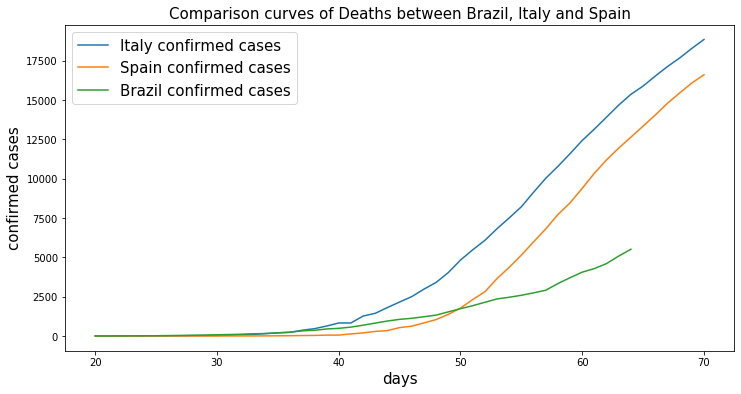

In [83]:
plt.figure(figsize=(12, 6))
plt.title('Comparison curves of Deaths between Brazil, Italy and Spain', size=15)
plt.plot(days_since_31_01[20:71, :], italy_deaths[20:71])
plt.plot(days_since_01_02[20:71, :], spain_deaths[20:71])
plt.plot(days_since_26_02[20:71, :], brazil_deaths[20:71])
plt.xlabel('days', size=15)
plt.ylabel('confirmed cases', size=15)
plt.legend(['Italy confirmed cases', 'Spain confirmed cases', 'Brazil confirmed cases'], prop={'size': 15})